In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
# Dosya yolu
file_path = '/content/finalemlak2.xlsx'

# Veri setini oku
df = pd.read_excel(file_path)



Mounted at /content/drive


In [2]:
# StandardScaler: Ortalama 0, std sapma 1 olacak şekilde ölçekleme
standard_scaler = StandardScaler()
df['price_standard_scaled'] = standard_scaler.fit_transform(df[['price']])

# MinMaxScaler: Değerleri 0 ile 1 arasına çeker
minmax_scaler = MinMaxScaler()
df['price_minmax_scaled'] = minmax_scaler.fit_transform(df[['price']])

# StandardScaler ile dönüştürülmüş fiyatlar
print("Standard Scaled Price:")
print(df['price_standard_scaled'])

# MinMaxScaler ile dönüştürülmüş fiyatlar
print("\nMinMax Scaled Price:")
print(df['price_minmax_scaled'])


Standard Scaled Price:
0      -0.364591
1      -0.532023
2      -0.541612
3      -0.584392
4      -0.605782
          ...   
2174   -0.583654
2175   -0.586604
2176   -0.620533
2177   -0.635285
2178   -0.657413
Name: price_standard_scaled, Length: 2179, dtype: float64

MinMax Scaled Price:
0       0.017872
1       0.009646
2       0.009175
3       0.007073
4       0.006023
          ...   
2174    0.007110
2175    0.006965
2176    0.005298
2177    0.004573
2178    0.003486
Name: price_minmax_scaled, Length: 2179, dtype: float64


In [3]:
inertia_values = []
silhouette_scores = []
k_range = range(2, 11) #K-means algoritmasını denemek için 2'den 10'a kadar olan k değerleri (küme sayısı) deneniyor.
# Standardize edilmiş price sütununu al
price_data = df[['price_standard_scaled']]
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10) # aşağıdaki kod parçaçığında en iyi random state değerini bulduk=0
    kmeans.fit(price_data) #Model, scaled_data üzerine eğitiliyor.
    inertia_values.append(kmeans.inertia_) #inertia (atalet) hesaplanıyor: Küme içindeki verilerin merkeze olan uzaklıklarının toplamı.(düşük olması iyi)
    silhouette_scores.append(silhouette_score(price_data, kmeans.labels_).item()) #Verinin kümelere ne kadar “iyi” ayrıldığını ölçen bir metrik. 1’e ne kadar yakınsa, kümeler o kadar ayrışmıştır.np.float64 olduğu için item() kullanıyoruz
#sonuçları yazdırma
print("Inertia Values:", inertia_values)
print("Silhouette Scores:", silhouette_scores)

# En uygun k
best_k = k_range[np.argmax(silhouette_scores)]
print("En iyi küme sayısı (k):", best_k)
#Veri 2 küme altında en iyi ayrılmış.

Inertia Values: [1153.9266136926935, 480.38470992063685, 298.6818600579729, 200.54286128551686, 121.06993619903132, 86.06278546584163, 60.61465713864882, 44.65085979683958, 34.05482877581347]
Silhouette Scores: [0.9473297444743427, 0.7886818139382811, 0.6912142054592719, 0.6915901183645891, 0.6655413257800284, 0.6130274169493327, 0.6095340506740309, 0.6129386386924571, 0.6070544187445782]
En iyi küme sayısı (k): 2


In [4]:
best_overall_score = -1 #-1 başlangıç için garanti düşük değer
best_state = None
best_model = None
#en iyi random state değerini ve en iyi sihouette skorunu bulduk.
k_range = range(2, 11)  # 2'den 10'a kadar k değerleri deneniyor(en az 2 küme)

for k in k_range:
    for state in range(0, 10):  # 0'dan 10'a kadar random_state deneniyor
        kmeans = KMeans(n_clusters=k, random_state=state, n_init=10)
        kmeans.fit(price_data)
        score = silhouette_score(price_data, kmeans.labels_)

        if score > best_overall_score:
            best_overall_score = score
            best_state = state
            best_model = kmeans

print(f"En iyi random_state: {best_state}")
print(f"En yüksek Silhouette skoru: {best_overall_score:.4f}")

En iyi random_state: 0
En yüksek Silhouette skoru: 0.9473


In [5]:
# Kümelenecek veri
price_data = df[['price_standard_scaled']]

# KMeans modelini 2 küme ile uygulama
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(price_data)

# Küme etiketlerini almak
df['cluster'] = kmeans.labels_

# Küme merkezlerini yazdırma
print("Küme Merkezleri:", kmeans.cluster_centers_)

# Her iki kümeden örnekler aldık.
cluster_0_samples = df[df['cluster'] == 0].head(5)  # Küme 0'dan ilk 5 örnek
cluster_1_samples = df[df['cluster'] == 1].head(5)  # Küme 1'den ilk 5 örnek

print("\nKüme 0'dan Örnekler:")
print(cluster_0_samples[['price_standard_scaled', 'cluster']])

print("\nKüme 1'den Örnekler:")
print(cluster_1_samples[['price_standard_scaled', 'cluster']])

# Silhouette skoru ile kümelerin doğruluğunu değerlendirme
sil_score = silhouette_score(price_data, kmeans.labels_)
print("Silüet Skoru (k=2):", sil_score)


Küme Merkezleri: [[-0.03893749]
 [12.08174748]]

Küme 0'dan Örnekler:
   price_standard_scaled  cluster
0              -0.364591        0
1              -0.532023        0
2              -0.541612        0
3              -0.584392        0
4              -0.605782        0

Küme 1'den Örnekler:
      price_standard_scaled  cluster
30                18.446059        1
1521              11.807787        1
1522              10.775167        1
1523              10.037581        1
1524               6.939721        1
Silüet Skoru (k=2): 0.9473297444743427


In [6]:
# Her kümede kaç tane örnek olduğunu gösterdik
print("\nHer Kümede Kaç Örnek Var:")
print(df['cluster'].value_counts())
#Yüzde olarak dağılımını gösterdik
print("\nKüme Dağılımı (Yüzde):")
print(df['cluster'].value_counts(normalize=True) * 100)
#Küme0 da çok yığılma var.



Her Kümede Kaç Örnek Var:
cluster
0    2172
1       7
Name: count, dtype: int64

Küme Dağılımı (Yüzde):
cluster
0    99.678752
1     0.321248
Name: proportion, dtype: float64


In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = best_model.labels_

# Silhouette Score: Kümelerin ayrışma kalitesi (1'e ne kadar yakınsa o kadar iyi)
silhouette = silhouette_score(price_data, labels)
print(f"Silhouette Score: {silhouette:.4f}")

# Calinski-Harabasz Index: Yüksek değer daha iyi (kümeler arası ayrışma / kümeler içi tutarlılık)
ch_score = calinski_harabasz_score(price_data, labels)
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

# Davies-Bouldin Index: Küçük değerler daha iyi (kümeler arası benzerlik / ayrışma ölçütü)
db_score = davies_bouldin_score(price_data, labels)
print(f"Davies-Bouldin Score: {db_score:.4f}")

#silhouette skoru 0.94 çıksada küme 0 da yığılma var.

Silhouette Score: 0.9473
Calinski-Harabasz Score: 1933.91
Davies-Bouldin Score: 0.3637


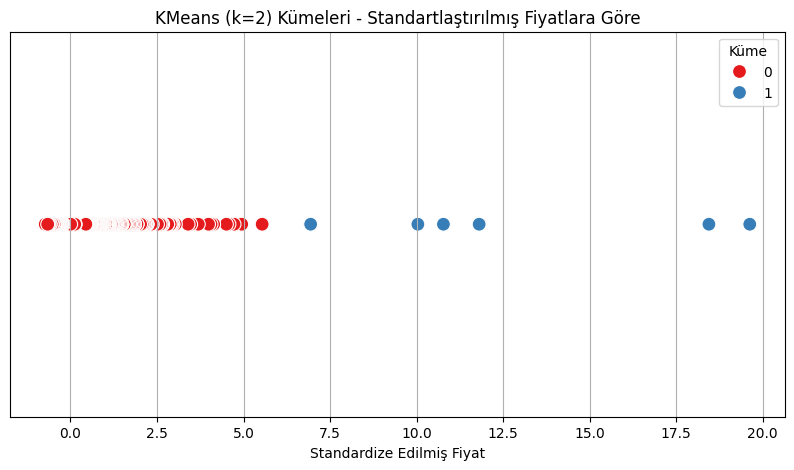

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutunu ayarla
plt.figure(figsize=(10, 5))

# Kümelere göre scatter plot
sns.scatterplot(data=df, x='price_standard_scaled', y=[0]*len(df), hue='cluster', palette='Set1', s=100)

plt.title('KMeans (k=2) Kümeleri - Standartlaştırılmış Fiyatlara Göre')
plt.xlabel('Standardize Edilmiş Fiyat')
plt.yticks([])  # Y ekseni gereksiz çünkü sadece fiyat üzerinden kümeliyoruz
plt.legend(title='Küme')
plt.grid(True)
plt.show()
#sadece 5 tane küme2 var diğerlerin hepsi küme1 de (bir kümeye yığılmış değerler)

In [9]:
#Kümelemeyi doğru yapabilmek için price sütununa etiket atadık.(optimizasyon)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Log dönüşümü ve ölçekleme (düşük fiyatları daraltmak için)
df['log_price'] = np.log1p(df['price'])
scaler = StandardScaler()
df['log_price_scaled'] = scaler.fit_transform(df[['log_price']])

#KMeans ile 3 küme
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df[['log_price_scaled']])
df['price_cluster'] = kmeans.labels_

#Küme merkezlerini aldık, küçükten büyüğe sıralayarak rakamsal kategoriye eşledik
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_idx = np.argsort(cluster_centers)  # [0,1,2]

# Map: sorted_idx[0] -> 0 (Düşük), sorted_idx[1] -> 1 (Orta), sorted_idx[2] -> 2 (Yüksek)
mapping = { sorted_idx[0]: 0,
            sorted_idx[1]: 1,
            sorted_idx[2]: 2 }

# # KMeans’in rastgele küme etiketlerini mantıklı bir sıraya (0: düşük, 1: orta, 2: yüksek) dönüştürdük.
df['price_cluster_numeric'] = df['price_cluster'].map(mapping)
df['price_cluster_label']   = df['price_cluster_numeric'].map({
    0: 'Düşük Fiyat',
    1: 'Orta Fiyat',
    2: 'Yüksek Fiyat'
})

#Her kategori için fiyat aralıkları
print("Fiyat Aralıkları:")
for cat in [0, 1, 2]:
    prices = df[df['price_cluster_numeric']==cat]['price']
    print(f"  Kategori {cat} ({df[df['price_cluster_numeric']==cat]['price_cluster_label'].iloc[0]}): "
          f"{prices.min():.2f} - {prices.max():.2f}")  # Kategorinin etiketini ve ilgili fiyat aralığını yazdırıyoruz (min - max)

#Her kategoriden ilk 10 örneği gösterDİK
sampled = pd.concat([
    df[df['price_cluster_numeric']==cat][['price','price_cluster_numeric']].head(10)
    for cat in [0,1,2]
]).reset_index(drop=True)

print("\nHer kategoriden ilk 10 örnek (price, numeric label):")
print(sampled)


Fiyat Aralıkları:
  Kategori 0 (Düşük Fiyat): 19000.00 - 3050000.00
  Kategori 1 (Orta Fiyat): 3075000.00 - 7900000.00
  Kategori 2 (Yüksek Fiyat): 7950000.00 - 138000000.00

Her kategoriden ilk 10 örnek (price, numeric label):
       price  price_cluster_numeric
0    2485000                      0
1    1350000                      0
2    1285000                      0
3     995000                      0
4     850000                      0
5    2600000                      0
6     750000                      0
7    3050000                      0
8    3050000                      0
9    3050000                      0
10   6500000                      1
11   6500000                      1
12   6500000                      1
13   6500000                      1
14   6000000                      1
15   5450000                      1
16   4100000                      1
17   3100000                      1
18   6500000                      1
19   6450000                      1
20  38500000    

In [10]:
# Her fiyat kümesinde kaç örnek olduğunu ve oranlarını yazdır
print("\nHer Kümeye Ait Örnek Sayısı ve Yüzdesi:")
cluster_counts = df['price_cluster_numeric'].value_counts(normalize=False).sort_index()
cluster_percent = df['price_cluster_numeric'].value_counts(normalize=True).sort_index() * 100

for i in [0, 1, 2]:
    label = df[df['price_cluster_numeric'] == i]['price_cluster_label'].iloc[0]
    count = cluster_counts[i]
    percent = cluster_percent[i]
    print(f"Küme {i} ({label}): {count} adet ({percent:.2f}%)")




Her Kümeye Ait Örnek Sayısı ve Yüzdesi:
Küme 0 (Düşük Fiyat): 1071 adet (49.15%)
Küme 1 (Orta Fiyat): 810 adet (37.17%)
Küme 2 (Yüksek Fiyat): 298 adet (13.68%)


In [11]:
labels = kmeans.labels_
silhouette = silhouette_score(price_data, labels)
ch_score = calinski_harabasz_score(price_data, labels)
db_score = davies_bouldin_score(price_data, labels)

print("\n--- Kümeleme Değerlendirme Metrikleri ---")
print(f"Silhouette Score: {silhouette:.4f}  (1'e ne kadar yakınsa o kadar iyi)")
print(f"Calinski-Harabasz Score: {ch_score:.2f}  (Yüksek = iyi)")
print(f"Davies-Bouldin Score: {db_score:.4f}  (Düşük = iyi)")

#bir önceki değerlere göre kötü çıksada kümeleme gerçek hayat problemine daha uygun oldu.


--- Kümeleme Değerlendirme Metrikleri ---
Silhouette Score: 0.5188  (1'e ne kadar yakınsa o kadar iyi)
Calinski-Harabasz Score: 824.92  (Yüksek = iyi)
Davies-Bouldin Score: 0.6789  (Düşük = iyi)


Ortalama Silhouette Skoru: 0.5649


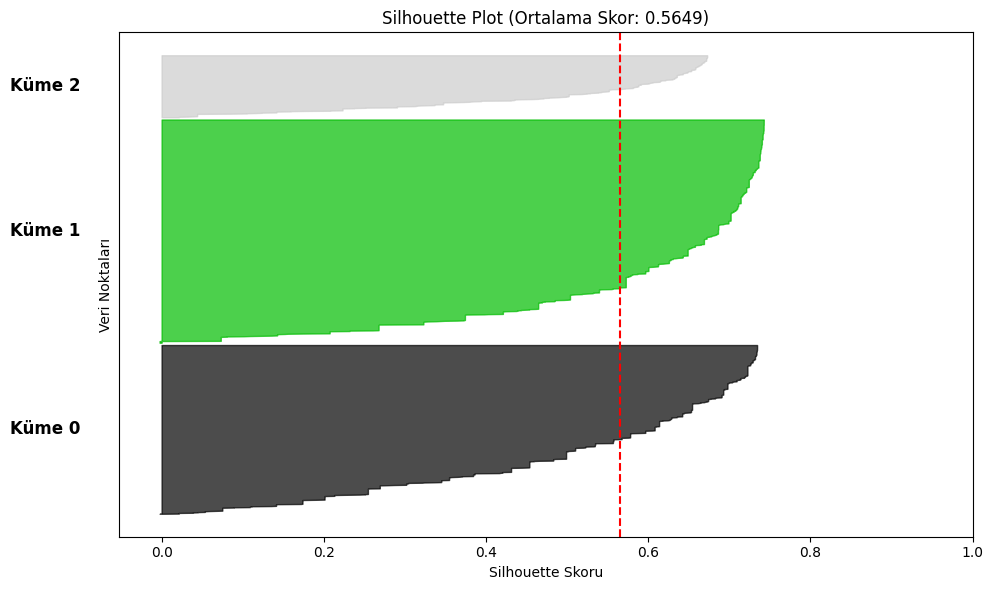

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# KMeans modelini uygulama
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df[['log_price_scaled']])

# Küme etiketlerini dataframe'e ekleme
df['price_cluster'] = kmeans.labels_

# Ortalama Silhouette Skoru
silhouette_avg = silhouette_score(df[['log_price_scaled']], df['price_cluster'])
print(f"Ortalama Silhouette Skoru: {silhouette_avg:.4f}")

# Her veri noktası için Silhouette skorları
silhouette_vals = silhouette_samples(df[['log_price_scaled']], df['price_cluster'])

#Silhouette Plot
fig, ax = plt.subplots(figsize=(10, 6))
#Her küme için farklı bir renk atanıyor ve çizim başlangıç pozisyonu belirleniyor.
y_lower = 10
n_clusters = 3
colors = plt.cm.nipy_spectral(np.linspace(0, 1, n_clusters))

for i, color in zip(range(n_clusters), colors):  #Her küme için (i = 0, 1, 2) ayrı ayrı grafik çiziyoruz.
    # Küme içindeki skorları ayır ve sırala
    cluster_silhouette_vals = silhouette_vals[df['price_cluster'] == i] # O kümeye ait verilerin skorlarını alıp sıralıyoruz (grafikte düzgün görünmesi için).
    cluster_silhouette_vals.sort()

    size_cluster = len(cluster_silhouette_vals)
    y_upper = y_lower + size_cluster #Bu kümenin ne kadar yüksekliğe sahip olacağı belirleniyor.

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7) # Kümenin Silhouette değerleri yatay olarak çiziliyor.

    #  Grafikte her kümenin ortasına küme etiketi yazılıyor.
    ax.text(x=-0.1, y=(y_lower + y_upper) / 2,
            s=f"Küme {i}", va='center', ha='right',
            fontsize=12, fontweight='bold')

    y_lower = y_upper + 10  # Sonraki küme için başlangıç y konumu

# Ortalama Silhouette skorunu gösteren dikey çizgi
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Eksen ayarları
ax.set_title(f"Silhouette Plot (Ortalama Skor: {silhouette_avg:.4f})")
ax.set_xlabel("Silhouette Skoru")
ax.set_ylabel("Veri Noktaları")
ax.set_yticks([])

# X eksenini otomatik olarak minimum skora göre ayarlama
ax.set_xlim([silhouette_vals.min() - 0.05, 1])

plt.tight_layout()
plt.show()


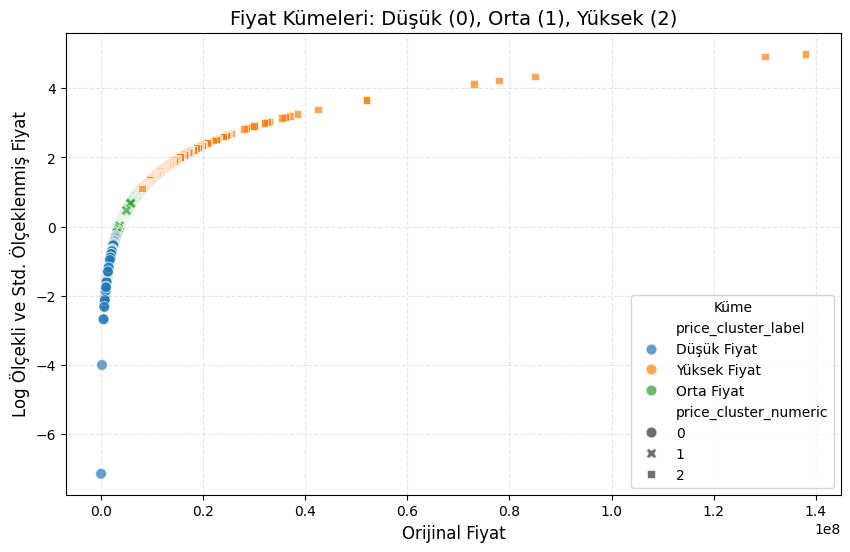

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# price: orijinal fiyat
# log_price_scaled: log1p(price) sonrası StandardScaler ile ölçeklenmiş değer
# price_cluster_numeric: 0,1,2 olarak atanmış küme numarası
# price_cluster_label: okunabilir etiket (Düşük, Orta, Yüksek)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='price',                    # yatay eksende orijinal fiyat
    y='log_price_scaled',         # dikey eksende ölçeklenmiş log fiyat
    hue='price_cluster_label',    # rengini küme etiketine göre ayarla
    style='price_cluster_numeric',# işaret şeklini küme numarasına göre ayarla (opsiyonel)
    palette=['#1f77b4','#ff7f0e','#2ca02c'], # Düşük-Orta-Yüksek için mavi-turuncu-yeşil
    s=60,                          # nokta boyutu
    alpha=0.7                      # %30 şeffaf
)

plt.title("Fiyat Kümeleri: Düşük (0), Orta (1), Yüksek (2)", fontsize=14)
plt.xlabel("Orijinal Fiyat", fontsize=12)
plt.ylabel("Log Ölçekli ve Std. Ölçeklenmiş Fiyat", fontsize=12)
plt.legend(title="Küme", loc="lower right")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


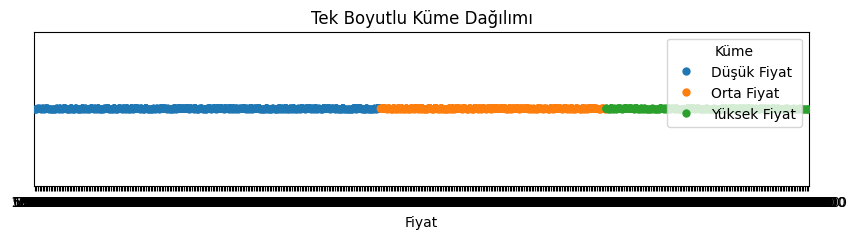

In [14]:
plt.figure(figsize=(10, 2))
# Stripplot çizimi (tek boyutlu dağılım grafiği)
sns.stripplot(
    x='price',                           # X eksenine fiyat değerlerini yerleştir
    y=np.zeros(len(df)),                 # Y ekseni sabit (hepsi 0), yani tek bir yatay çizgi üzerinde göster
    hue='price_cluster_label',           # Noktaların rengine kümelere göre renk ver (kmeans küme etiketleri)
    data=df,                             # Verisetini belirt
    palette=['#1f77b4','#ff7f0e','#2ca02c'],  # Her kümeye özel renkler belirle
    size=6,                              # Noktaların boyutu
    jitter=0.2                           # Noktaları biraz dağıtarak üst üste binmelerini önle (y ekseninde yayılma)
)
plt.yticks([])
plt.xlabel("Fiyat")
plt.title("Tek Boyutlu Küme Dağılımı")
plt.legend(title="Küme", loc="upper right")
plt.show()


Düşük Fiyat (Cluster 0) aralığı: 19000.00 – 3050000.00
Orta Fiyat (Cluster 1) aralığı: 3075000.00 – 7900000.00
Yüksek Fiyat (Cluster 2) aralığı: 7950000.00 – 138000000.00


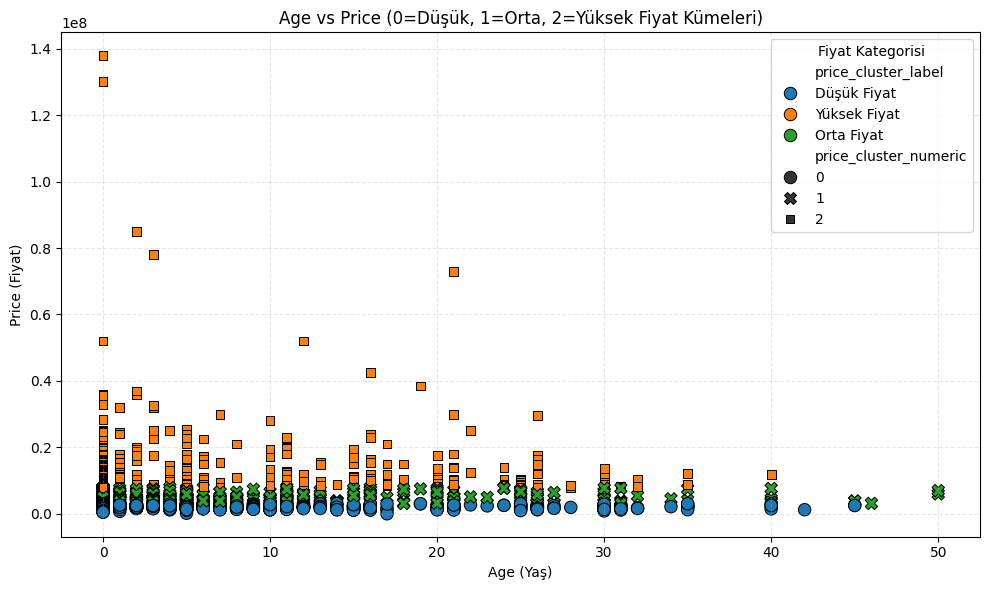

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Log dönüşümü ve ölçekleme
df['log_price'] = np.log1p(df['price'])
scaler = StandardScaler()
df['log_price_scaled'] = scaler.fit_transform(df[['log_price']])

# KMeans ile 3 küme oluştuma
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(df[['log_price_scaled']])
df['price_cluster'] = kmeans.labels_

#Küme merkezlerini alıp küçükten büyüğe sıralayıp sayısal kategori eşlemesi yapma
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_idx = np.argsort(cluster_centers)
# sorted_idx[0] en küçük merkez, sorted_idx[2] en büyük merkez

# mapping: gerçek küme etiketi → 0,1,2
numeric_map = {
    sorted_idx[0]: 0,
    sorted_idx[1]: 1,
    sorted_idx[2]: 2
}

# sayısal etiket ve okunabilir label sütunları yazma
df['price_cluster_numeric'] = df['price_cluster'].map(numeric_map)
label_map = {0: 'Düşük Fiyat', 1: 'Orta Fiyat', 2: 'Yüksek Fiyat'}
df['price_cluster_label'] = df['price_cluster_numeric'].map(label_map)

#Küme aralıklarını (min–max) değerleri ile yazma
for num in [0,1,2]:
    rng = df[df['price_cluster_numeric']==num]['price']
    print(f"{label_map[num]} (Cluster {num}) aralığı: {rng.min():.2f} – {rng.max():.2f}")

#Scatter plot: age vs price, doğru etiketlerle;
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='age',
    y='price',
    hue='price_cluster_label',     # okunabilir etiketler
    palette=['#1f77b4','#ff7f0e','#2ca02c'],
    style='price_cluster_numeric', # 0,1,2 işaret şekli
    s=80,
    edgecolor='black'
)

plt.title("Age vs Price (0=Düşük, 1=Orta, 2=Yüksek Fiyat Kümeleri)")
plt.xlabel("Age (Yaş)")
plt.ylabel("Price (Fiyat)")
plt.legend(title="Fiyat Kategorisi", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
